
Anomaly or fraud refers to data that contains values that deviate from the norm or appear abnormal compared to other data points. Machine learning methods can be employed to predict anomalies, both in scenarios where labeled data is unavailable (unsupervised) and when labeled data is present (supervised). In the context of unsupervised learning, two main methods for detecting anomalies are:

- Univariate
- Multivariate

These approaches aim to identify anomalies based on the analysis of either a single variable (univariate) or multiple variables simultaneously (multivariate).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate with One Peak Distribution

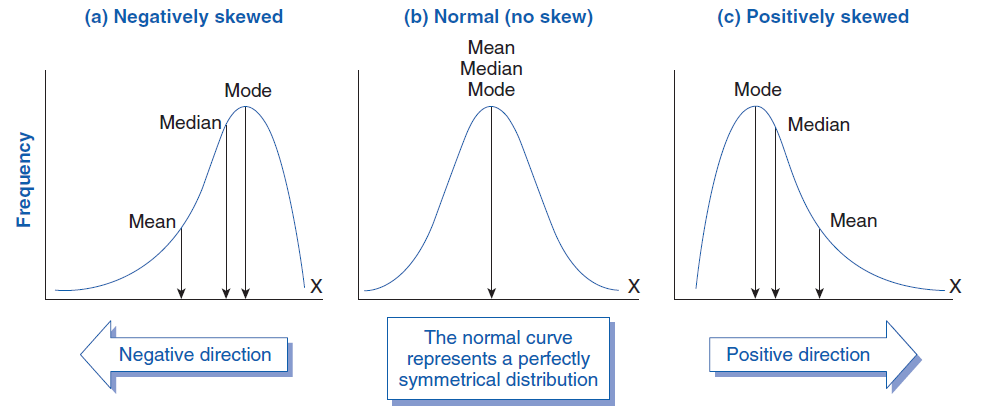

Using this method if your data have normal and skew distribution

## Standard Deviations from the Mean

$$
\text {std_mean} = \frac {\text {|val - mean|}}{\text {min_num_std} \cdot \text {std}}
$$

If ∣val−mean∣ is less than
min_num_sd
×
sd, the value is considered an anomaly, and the anomaly score is returned. Otherwise, the anomaly score is 1.0, indicating that the value is normal.

In [ ]:
def check_sd(val, mean, sd, min_num_sd):
    """
    Measures the anomaly level of a value based on the comparison with the mean and standard deviation.

    Parameters:
    -----------
    val : float
        The value to be tested for anomaly level.

    mean : float
        The mean of the data.

    sd : float
        The standard deviation of the data.

    min_num_sd : float
        The number of standard deviations allowed to determine if the value is considered an anomaly.

    Returns:
    --------
    Anomaly score, a value between 0 and 1, where lower values indicate higher anomaly levels.
    If the value is considered normal, the function returns 1.0.
    """
    if abs(val - mean) < (min_num_sd * sd):
        return abs(val - mean) / (min_num_sd * sd)
    else:
        return 1.0

# Example dummy data
data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Calculating the mean and standard deviation of the data
mean_data = sum(data) / len(data)
sd_data = (sum([(x - mean_data) ** 2 for x in data]) / len(data)) ** 0.5

# Determining the number of standard deviations allowed
min_num_sd = 2

# Creating lists to store anomaly labels and data used as indices
labels_anomaly = []
index_data = []

# Using a loop to test each value
for test_value in data:
    # Using the anomaly detection function
    anomaly_score = check_sd(test_value, mean_data, sd_data, min_num_sd)

    # Determining the label based on the Anomaly Score
    anomaly_label = 0 if anomaly_score < 1.0 else 1

    # Adding the label and data to the lists
    labels_anomaly.append(anomaly_label)
    index_data.append(test_value)

# Creating a Pandas Series from the list of anomaly labels with data as indices
series_labels_anomaly = pd.Series(labels_anomaly, index=index_data)

# Displaying the results
print("Anomaly Labels (Pandas Series):")
series_labels_anomaly

Anomaly Labels (Pandas Series):


10     0
12     0
10     0
11     0
10     0
12     0
9      0
10     0
13     0
100    1
dtype: int64

## Median Absolute Deviations from the Median

$$
\text {std_med} = \frac {\text {val - mid_point}} {\text {n} \cdot \text {distance}}
$$

If
∣val−midpoint∣ is less than
n
×
distance, the value is considered an anomaly, and the anomaly score is returned. Otherwise, the anomaly score is 1.0, indicating that the value is normal.

In [ ]:
def check_med(val, midpoint, distance, n):
    """
    Measures the anomaly level of a value based on the distance from the midpoint.

    Parameters:
    -----------
    val : float
        The value to be tested for anomaly level.

    midpoint : float
        The midpoint value of the data.

    distance : float
        The allowed distance from the midpoint.

    n : float
        The factor that controls how far a value can deviate from the midpoint.

    Returns :
    ---------
        float: Anomaly score, a value between 0 and 1, where lower values indicate higher anomaly levels.
    If the value is considered normal, the function returns 1.0.
    """
    if abs(val - midpoint) < n * distance:
        return abs(val - midpoint) / (n * distance)
    else:
        return 1.0

# Example dummy data
data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Calculating the median and Median Absolute Deviation (MAD) of the data
median_data = np.median(data)
mad_data = np.median(np.abs(data - median_data))

# Determining the number of MADs allowed
min_num_mad = 2

# Creating lists to store anomaly labels and data used as indices
labels_anomaly = []
index_data = []

# Using a loop to test each value
for test_value in data:
    # Using the anomaly detection function
    anomaly_score = check_med(test_value, median_data, mad_data, min_num_mad)

    # Determining the label based on the Anomaly Score
    anomaly_label = 0 if anomaly_score < 1.0 else 1

    # Adding the label and data to the lists
    labels_anomaly.append(anomaly_label)
    index_data.append(test_value)

# Creating a Pandas Series from the list of anomaly labels with data as indices
series_labels_anomaly = pd.Series(labels_anomaly, index=index_data)

# Displaying the results
print("Anomaly Labels (Pandas Series):")
series_labels_anomaly

Anomaly Labels (Pandas Series):


10     0
12     0
10     0
11     0
10     0
12     0
9      0
10     0
13     1
100    1
dtype: int64

## Distance from the Interquartile Range

If val is less than the median:
- If $ \text{p25 < val < median} $, then the anomaly score is set to 0.0 (normal value).
- If $(\text {p25 - val}) < \text {(min_iqr_diff)} \cdot \text {(iqr)}$, then the anomaly score is calculated as

  $ \frac {\text{(p25 - val)}} {\text {(min_iqr_diff)} \cdot \text {(iqr)}} $

- If the above conditions are not met, the anomaly score is set to 1.0 (normal value).

If val is greater than the median:
- If $ \text {median < val < p75} $, then the anomaly score is set to 0.0 (normal value).
- If $ \text{(val - p75)} < \text {(min_iqr_diff)} \cdot \text{iqr)} $, then the anomaly score is calculated as

  $ \frac{\text {(val - p75)}} {\text {(min_iqr_diff)} \cdot \text {(iqr)}} $
- If the above conditions are not met, the anomaly score is set to 1.0 (normal value).

In [ ]:
def check_iqr(val, median, p25, p75, iqr, min_iqr_diff):
    """
    Measures the anomaly level of a value based on the Interquartile Range (IQR).

    Parameters:
    -----------
    val : float
        The value to be tested for anomaly level.

    median : float
        The median of the data.

    p25 : float
        The 25th percentile (Q1) of the data.

    p75 : float
        The 75th percentile (Q3) of the data.

    iqr : float
        The Interquartile Range (IQR) of the data (Q3 - Q1).

    min_iqr_diff : float
        The factor that controls how far a value can deviate from the quartiles to be considered an anomaly.

    Returns:
    --------
    float: Anomaly score, a value between 0 and 1, where lower values indicate higher anomaly levels.
    If the value is considered normal, the function returns 1.0.
    """
    if val < median:
        if p25 < val < median:
            return 0.0
        elif (p25 - val) < (min_iqr_diff * iqr):
            return abs(p25 - val) / (min_iqr_diff * iqr)
        else:
            return 1.0
    else:
        if median < val < p75:
            return 0.0
        elif (val - p75) < (min_iqr_diff * iqr):
            return abs(val - p75) / (min_iqr_diff * iqr)
        else:
            return 1.0

# Example dummy data
data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Calculating the values required for the check_iqr function
median_data = np.median(data)
p25_data = np.percentile(data, 25)
p75_data = np.percentile(data, 75)
iqr_data = p75_data - p25_data
min_iqr_diff = 1.5  # Adjust as needed

# Creating lists to store anomaly labels and data used as indices
labels_anomaly_iqr = []
index_data_iqr = []

# Using a loop to test each value
for test_value in data:
    # Using the IQR anomaly detection function
    anomaly_score_iqr = check_iqr(test_value, median_data, p25_data, p75_data, iqr_data, min_iqr_diff)

    # Determining the label based on the Anomaly Score
    label_anomaly_iqr = 0 if anomaly_score_iqr < 1.0 else 1

    # Adding the label and data to the lists
    labels_anomaly_iqr.append(label_anomaly_iqr)
    index_data_iqr.append(test_value)

# Creating a Pandas Series from the list of IQR anomaly labels with data as indices
series_labels_anomaly_iqr = pd.Series(labels_anomaly_iqr, index=index_data_iqr)

# Displaying the results
print("IQR Anomaly Labels (Pandas Series):")
print(series_labels_anomaly_iqr)

IQR Anomaly Labels (Pandas Series):
10     0
12     0
10     0
11     0
10     0
12     0
9      0
10     0
13     0
100    1
dtype: int64


## Determine Outlier Base on Sentivity and maximum Fraction anomaly

This is the example I give using MAD (Median Absolute Deviation). You can setting:

**sensitivity_score**: This parameter represents the sensitivity score, ranging from 1 to 100. In the context of anomaly detection, a higher sensitivity score means that fewer values will be classified as anomalies. The function adjusts this sensitivity score to a proportion between 0 and 1, where a lower value corresponds to a higher sensitivity.

**max_fraction_anomalies**: This parameter represents the maximum fraction of anomalies allowed in the dataset, ranging from 0 to 1. For example, if max_fraction_anomalies is set to 0.2, it means that at most 20% of the data can be considered anomalies. The function uses this parameter to determine the threshold for considering a value as an anomaly based on the 'anomaly_score' column in the DataFrame.

In [ ]:
def check_med(val, median, mad, min_num_mad):
    """
    Measures the anomaly level of a value based on the Median Absolute Deviation (MAD).

    Parameters:
    -----------
    val : float
        The value to be tested for anomaly level.

    median : float
        The median of the data.

    mad : float
        The Median Absolute Deviation (MAD) of the data.

    min_num_mad : float
        The number of MADs allowed to determine whether a value is considered an anomaly.

    Returns:
    --------
        float: Anomaly score, a value between 0 and 1, where lower values indicate higher anomaly levels.
    If the value is considered normal, the function returns 1.0.
    """
    if abs(val - median) < min_num_mad * mad:
        return abs(val - median) / (min_num_mad * mad)
    else:
        return 1.0

def determine_outliers(df, sensitivity_score, max_fraction_anomalies):
    """
    Determines whether a value in a DataFrame is an outlier based on sensitivity score and maximum fraction of anomalies.

    Parameters:
    ------------
    df : pd.DataFrame
        DataFrame containing the 'anomaly_score' column.

    sensitivity_score : float
        Sensitivity score (1-100).

    max_fraction_anomalies : float
        Maximum fraction of anomalies allowed (0-1).

    Returns:
    ---------
        DataFrame with an additional 'is_anomaly' column.
    """
    sensitivity_score = (100 - sensitivity_score) / 100.0
    max_fraction_anomaly_score = np.quantile(df['anomaly_score'], 1.0 - max_fraction_anomalies)

    if max_fraction_anomaly_score > sensitivity_score and max_fraction_anomalies < 1.0:
        sensitivity_score = max_fraction_anomaly_score

    return df.assign(is_anomaly=(df['anomaly_score'] > sensitivity_score).astype(int))

# Example dummy data
data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Calculating the median and Median Absolute Deviation (MAD) from the data
median_data = np.median(data)
mad_data = np.median(np.abs(data - median_data))

# Determining the number of MADs allowed
min_num_mad = 2

# Creating a list to store anomaly scores
anomaly_scores = [check_med(value, median_data, mad_data, min_num_mad) for value in data]

# Creating a DataFrame from the anomaly scores
df = pd.DataFrame({'anomaly_score': anomaly_scores})

# Determining outliers based on sensitivity score and maximum fraction of anomalies
sensitivity_score = 80  # values with anomaly scores above or equal to 80 (range 1 - 100)
max_fraction_anomalies = 0.2  # maximum 20% of the data can be considered anomalies
result_df = determine_outliers(df, sensitivity_score, max_fraction_anomalies)

# Displaying the results
print("DataFrame with 'is_anomaly' Column:")
result_df

DataFrame with 'is_anomaly' Column:


,anomaly_score,is_anomaly
0,0.25,0
1,0.75,0
2,0.25,0
3,0.25,0
4,0.25,0
5,0.75,0
6,0.75,0
7,0.25,0
8,1.00,1
9,1.00,1


## Checking normal distribution using  Anderson-Darling test concept

Why I'm recommending this method?

You can know what the distribution is, normal or not. Just to be confident, if you determine what method to use, what should you do!

The critical values for the Anderson-Darling test depend on the chosen significance levels. The critical values for a range of significance levels (5%, 2.5%, 1%, 0.5%, and 0.1%) are pre-computed and provided by the anderson function in SciPy. The test compares the computed statistic with these critical values to determine whether the data can be considered normally distributed.

The Anderson-Darling test is applied to the dataset, and the results are interpreted as follows:

- If the test statistic is less than the critical value, the data looks normally distributed at that significance level.

- If the test statistic is greater than the critical value, the data does not look normally distributed at that significance level.
The final decision about normality is based on comparing the computed test statistic with the critical values at the user-specified significance level (alpha).

In [ ]:
from scipy.stats import anderson

def check_anderson(col, alpha=0.05):
    """
    Perform Anderson-Darling test for normality on a given dataset.

    Parameters:
    ------------
    col : array-like
        The input dataset for normality testing.

    alpha : float
        Significance level for the test. Default is 0.05.

    Returns:
    ---------
        A tuple containing a boolean indicating whether the dataset is normally distributed
    and a string providing details of the test results.
    """
    # Start by assuming normality.
    anderson_normal = True
    return_str = "Anderson-Darling test. "

    # Perform Anderson-Darling test
    result = anderson(col)
    return_str = return_str + f"Result statistic: {result.statistic}"

    # Check critical values at different significance levels
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]

        if result.statistic < cv:
            return_str = return_str + f"Significance Level {sl}: \
            Critical Value = {cv}, looks normally distributed. "
        else:
            anderson_normal = False
            return_str = return_str + f"Significance Level {sl}: \
            Critical Value = {cv}, does NOT look normally distributed! "

    # Compare with user-defined significance level
    if result.statistic < result.critical_values[result.significance_level == alpha]:
        return_str = return_str + f"At {alpha}% significance level: \
        Critical Value = {result.critical_values[result.significance_level == alpha]},\
        looks normally distributed. "

    else:
        anderson_normal = False
        return_str = return_str + f"At {alpha}% significance level: \
        Critical Value = {result.critical_values[result.significance_level == alpha]}, \
        does NOT look normally distributed! "

    return anderson_normal, return_str

# Example usage with a dictionary data
data_dict = {'values': np.random.normal(size=100)}

# Convert the dictionary data to a DataFrame
df = pd.DataFrame(data_dict)

# Test normality with a significance level of 5%
result, message = check_anderson(df['values'], alpha=0.05)

# Display the results
print("Results for a normal dataset:")
print(message)
print("Is the dataset normal? ", result)

Results for a normal dataset:
Anderson-Darling test. Result statistic: 0.24902918252315942Significance Level 15.0:             Critical Value = 0.555, looks normally distributed. Significance Level 10.0:             Critical Value = 0.632, looks normally distributed. Significance Level 5.0:             Critical Value = 0.759, looks normally distributed. Significance Level 2.5:             Critical Value = 0.885, looks normally distributed. Significance Level 1.0:             Critical Value = 1.053, looks normally distributed. At 0.05% significance level:         Critical Value = [],         does NOT look normally distributed! 
Is the dataset normal?  False


<ipython-input-6-4c37ac9d6da5>:41: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if result.statistic < result.critical_values[result.significance_level == alpha]:


## Detection Outlier with Statistical Concept

### Detection Outlier with Grubbs' test

$$
G = \frac {\text{max_i} \cdot |X_i -\bar {X}|} {\text {s}}
$$

$X_i$ :  is the value of the observation in the dataset

$\bar{X}$:  is the sample mean of the dataset

$s$: is the sample standard deviation

 the Grubbs' test involves calculating the test statistic (
G) for each data point and comparing it to a critical value to identify outliers. The provided Python code uses the z-score method to achieve a similar outcome.

In [ ]:
from scipy.stats import zscore

def check_grubbs(col, threshold=2.0):
    """
    Check for outliers in a numerical column using Grubbs' test.

    Parameters :
    ------------
    col : array-like
        Numeric column to be checked for outliers.

    threshold : float
        Grubbs' test critical value, defaults to 2.0.

    Returns :
    ---------
    is_outlier : array
        Boolean array indicating whether each value in col is an outlier.
    """
    z_scores = zscore(col)
    is_outlier = np.abs(z_scores) > threshold
    return is_outlier


def find_differences(col, is_outlier):
    """
    Find differences between the original column and the outlier detection results.

    Parameters :
    ------------
    col : array-like
        Original numeric column.

    is_outlier : array
        Boolean array indicating whether each value in col is an outlier.

    Returns :
    ---------
    res : array
         Numeric array indicating outliers with 1.0 and non-outliers with 0.0.
    """
    res = [1.0 if outlier else 0.0 for outlier in is_outlier]
    return res

# Contoh penggunaan dengan data dictionary
data_dict = {'values': np.concatenate([np.random.normal(size=90), np.random.normal(loc=10, size=10)])}

# Konversi data dictionary ke dalam DataFrame
df = pd.DataFrame(data_dict)

# Deteksi outlier menggunakan Grubbs' test dengan threshold 2.0
outliers_grubbs = check_grubbs(df['values'], threshold=2.0)

# Tampilkan hasil deteksi outlier
result_df = pd.DataFrame({'Values': df['values'], 'Outlier': outliers_grubbs})
result_df

,Values,Outlier
0,0.971474,False
1,-0.841640,False
2,-0.897458,False
3,1.160080,False
4,0.654902,False
...,...,...
95,10.926174,True
96,11.370365,True
97,10.953565,True
98,9.861646,True


### Detection Outlier with Dixon test

Q_min (minimum difference):

$$
Qmin = \frac {X_2 - X_1} {X_{max} - X_1}
$$

Q_max (maximum difference):

$$
Qmin = \frac {X_{n-1} - X_n} {X_{n} - X_1}
$$

The critical values for
$Q$ at a certain confidence level (e.g., 95%) are pre-determined based on the sample size. If min $Q_{min}$ or max $Q_{max}$ is greater than the critical value for the sample size, then the corresponding observation is considered an outlier.

In [ ]:
def check_dixon(col):
    """
    Perform Dixon's Q test for outlier detection.

    Parameters :
    ------------

    col : pandas Series
        Input data to be tested for outliers.

    Returns :
    ---------
        A list where each element is 1.0 if the corresponding data point is an outlier,
    and 0.0 otherwise.
    """
    # Critical values for Dixon's Q test at 95% confidence level
    q95 = [0.97, 0.829, 0.71, 0.625, 0.568, 0.526, 0.493, 0.466,
           0.444, 0.426, 0.41, 0.396, 0.384, 0.374, 0.365, 0.356,
           0.349, 0.342, 0.337, 0.331, 0.326, 0.321, 0.317, 0.312,
           0.308, 0.305, 0.301, 0.29]

    # Create a dictionary for critical values based on the number of observations
    Q95 = {n: q for n, q in zip(range(3, len(q95) + 1), q95)}

    # Initialize variables for minimum and maximum differences
    Q_mindiff, Q_maxdiff = (0, 0), (0, 0)

    # Sort the input data
    sorted_data = sorted(col)

    # Calculate Q_min (minimum difference)
    Q_min = (sorted_data[1] - sorted_data[0])
    try:
        Q_min = Q_min / (sorted_data[-1] - sorted_data[0])
    except ZeroDivisionError:
        pass
    Q_mindiff = (Q_min - Q95[len(col)], sorted_data[0])

    # Calculate Q_max (maximum difference)
    Q_max = abs(sorted_data[-2] - sorted_data[-1])
    try:
        Q_max = Q_max / abs(sorted_data[0] - sorted_data[-1])
    except ZeroDivisionError:
        pass
    Q_maxdiff = (Q_max - Q95[len(col)], sorted_data[-1])

    # Initialize a result list with zeros
    res = [0.0 for val in col]

    # Mark outliers based on Q_max and Q_min differences
    if Q_maxdiff[0] >= 0:
        indexes = col[col == Q_maxdiff[1]].index
        for i in indexes:
            res[i] = 1.0

    if Q_mindiff[0] >= 0:
        indexes = col[col == Q_mindiff[1]].index
        for i in indexes:
            res[i] = 1.0

    return res

# Example input data
data = [1, 2, 3, 4, 5, 6, 50, 95, 96, 97, 98, 99, 1000]

# Convert data to a pandas Series
series_data = pd.Series(data)

# Check for outliers using Dixon's Q test
outliers = check_dixon(series_data)

# Print the result
print(outliers)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


## Compare a few outlier detection methods

We have opted for the MAD and Dixon methods, prioritizing their robustness in handling new data. Unlike conventional approaches that utilize the interquartile range, Grubbs' test, and the median absolute deviation (MED), we believe that MAD and Dixon methods offer greater flexibility in adapting to unforeseen data variations.

If your data has a normal distribution, you can use the interquartile range, Grubbs' test, and the median absolute deviation (MED).

In [ ]:
def check_med(val, median, mad, min_num_mad):
    """
    Mengukur tingkat anomali suatu nilai berdasarkan Median Absolute Deviation (MAD).

    Parameters:
    -----------
    val : float
        Nilai yang akan diuji untuk tingkat anomali.

    median : float
        Median dari data.

    mad : float
        Median Absolute Deviation (MAD) dari data.

    min_num_mad : float
        Jumlah MAD yang diizinkan untuk menentukan apakah nilai dianggap anomali.

    Returns :
    ---------
        float: Anomaly score, nilai antara 0 dan 1, di mana nilai yang lebih rendah menunjukkan tingkat anomali yang lebih tinggi.
        Jika nilai dianggap normal, fungsi mengembalikan 1.0.
    """
    if abs(val - median) < min_num_mad * mad:
        return abs(val - median) / (min_num_mad * mad)
    else:
        return 1.0

def determine_outliers(df, sensitivity_score, max_fraction_anomalies):
    """
    Menentukan apakah suatu nilai dalam DataFrame merupakan outlier berdasarkan skor sensitivitas dan maksimum fraksi anomali.

    Parameters :
    ------------

    df : pd.DataFrame
        DataFrame yang berisi kolom 'anomaly_score'.

    sensitivity_score : float
        Skor sensitivitas (1-100).

    max_fraction_anomalies : float
        Maksimum fraksi anomali yang diizinkan (0-1).

    Returns :
    ---------
        DataFrame dengan kolom tambahan 'MAD'.
    """
    sensitivity_score = (100 - sensitivity_score) / 100.0
    max_fraction_anomaly_score = np.quantile(df['MAD'], 1.0 - max_fraction_anomalies)

    if max_fraction_anomaly_score > sensitivity_score and max_fraction_anomalies < 1.0:
        sensitivity_score = max_fraction_anomaly_score

    return df.assign(Median_AD=(df['MAD'] > sensitivity_score).astype(int))

def check_dixon(data):
    """
    Perform Dixon's Q test for outlier detection.

    Parameters :
    ------------

    col : pandas Series
        Input data to be tested for outliers.

    Returns :
    ---------
        A list where each element is 1.0 if the corresponding data point is an outlier,
    and 0.0 otherwise.
    """
    # Change data to series
    series_data = pd.Series(data)

    # Critical values for Dixon's Q test at 95% confidence level
    q95 = [0.97, 0.829, 0.71, 0.625, 0.568, 0.526, 0.493, 0.466,
           0.444, 0.426, 0.41, 0.396, 0.384, 0.374, 0.365, 0.356,
           0.349, 0.342, 0.337, 0.331, 0.326, 0.321, 0.317, 0.312,
           0.308, 0.305, 0.301, 0.29]

    # Create a dictionary for critical values based on the number of observations
    Q95 = {n: q for n, q in zip(range(3, len(q95) + 1), q95)}

    # Initialize variables for minimum and maximum differences
    Q_mindiff, Q_maxdiff = (0, 0), (0, 0)

    # Sort the input data
    sorted_data = sorted(series_data)

    # Calculate Q_min (minimum difference)
    Q_min = (sorted_data[1] - sorted_data[0])
    try:
        Q_min = Q_min / (sorted_data[-1] - sorted_data[0])
    except ZeroDivisionError:
        pass
    Q_mindiff = (Q_min - Q95[len(series_data)], sorted_data[0])

    # Calculate Q_max (maximum difference)
    Q_max = abs(sorted_data[-2] - sorted_data[-1])
    try:
        Q_max = Q_max / abs(sorted_data[0] - sorted_data[-1])
    except ZeroDivisionError:
        pass
    Q_maxdiff = (Q_max - Q95[len(series_data)], sorted_data[-1])

    # Initialize a result list with zeros
    res = [0.0 for val in series_data]

    # Mark outliers based on Q_max and Q_min differences
    if Q_maxdiff[0] >= 0:
        indexes = series_data[series_data == Q_maxdiff[1]].index
        for i in indexes:
            res[i] = 1.0

    if Q_mindiff[0] >= 0:
        indexes = series_data[series_data == Q_mindiff[1]].index
        for i in indexes:
            res[i] = 1.0

    return res

def check_outlier_MAD(data, sensitivity_score=80, max_fraction_anomalies=0.2, min_num_mad=2):
    """
    Menghitung skor anomali berdasarkan Median Absolute Deviation (MAD) dan menentukan outliers.

    Parameters:
    -----------
    data : list atau array-like
        Data yang akan dianalisis.

    sensitivity_score : float, default 80
        Skor sensitivitas (1-100).

    max_fraction_anomalies : float, default 0.2
        Maksimum fraksi anomali yang diizinkan (0-1).

    min_num_mad : float, default 2
        Jumlah MAD yang diizinkan untuk menentukan apakah nilai dianggap anomali.

    Returns:
    ---------
    pd.DataFrame
        DataFrame dengan kolom 'MAD' dan 'is_anomaly'.
    """
    # Menghitung median dan Median Absolute Deviation (MAD) dari data
    median_data = np.median(data)
    mad_data = np.median(np.abs(data - median_data))

    # Membuat list untuk menyimpan skor anomali
    anomaly_scores = [check_med(nilai, median_data, mad_data, min_num_mad) for nilai in data]

    # Membuat DataFrame dari skor anomali
    df = pd.DataFrame({'MAD': anomaly_scores})

    # Menentukan outliers berdasarkan skor sensitivitas dan maksimum fraksi anomali
    outlier_data = determine_outliers(df, sensitivity_score, max_fraction_anomalies)
    outlier_data.drop(columns='MAD', inplace=True)

    return outlier_data

def scatterplot(data):
    """
    Create a scatter plot with color coding based on outlier detection results.

    Parameters:
    -----------
    data : list or array-like
        Input data to be analyzed and plotted.

    Returns:
    ---------
    pd.DataFrame
        DataFrame containing outlier detection results and the input data.
    """
    result = check_outlier_MAD(data)
    result['Dixon'] = check_dixon(data)
    result['Dixon'] = result['Dixon'].astype(int)

    result.insert(loc=0, column='Random_data', value=pd.Series(data, name='Random_data'))

    # Create a scatter plot with color coding
    colors = []

    for idx, row in result.iterrows():
        if row['Median_AD'] == 1 and row['Dixon'] == 1:
            colors.append('black')
        elif row['Median_AD'] == 0 and row['Dixon'] == 0:
            colors.append('blue')
        else:
            colors.append('red')

    # Plotting
    scatter = plt.scatter(range(len(result)), result['Random_data'], c=colors)

    # Adding legend outside the box
    legend_labels = {
        'All Outliers': 'black',
        'No Outliers': 'blue',
        'Mixed Outliers': 'red'
    }
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                       for label, color in legend_labels.items()]

    # Place legend outside the box
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Y-axis Label')
    plt.title('Scatter Plot with Color Coding')

    # Show the plot
    plt.show()

    return result

**Test 1**

---

<ipython-input-10-d551480677b6>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


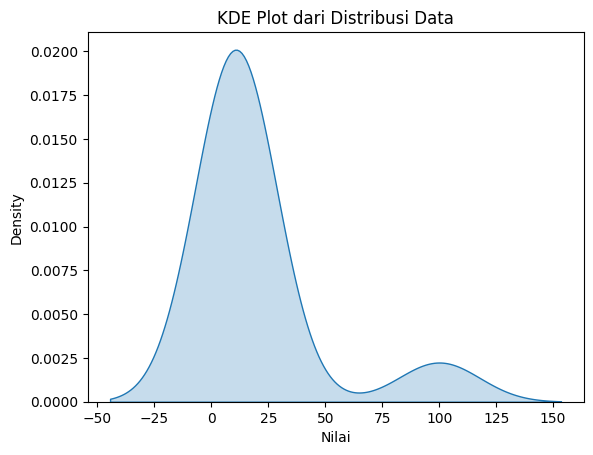

In [ ]:
# Test 1
data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Membuat KDE plot menggunakan Seaborn
sns.kdeplot(data, shade=True)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Density')
plt.title('KDE Plot dari Distribusi Data')

# Menampilkan plot
plt.show()

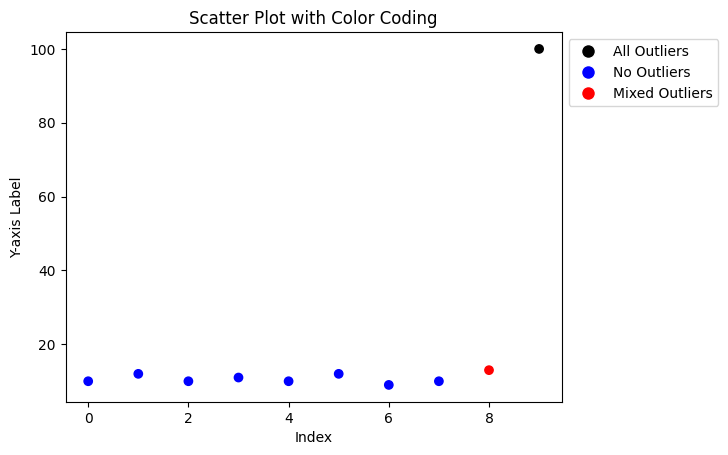

,Random_data,Median_AD,Dixon
0,10,0,0
1,12,0,0
2,10,0,0
3,11,0,0
4,10,0,0
5,12,0,0
6,9,0,0
7,10,0,0
8,13,1,0
9,100,1,1


In [ ]:
# Example data
data1 = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100]

# Display the result
data_outlier = scatterplot(data1)

data_outlier

**Test 2**

---

<ipython-input-12-914c437eb174>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


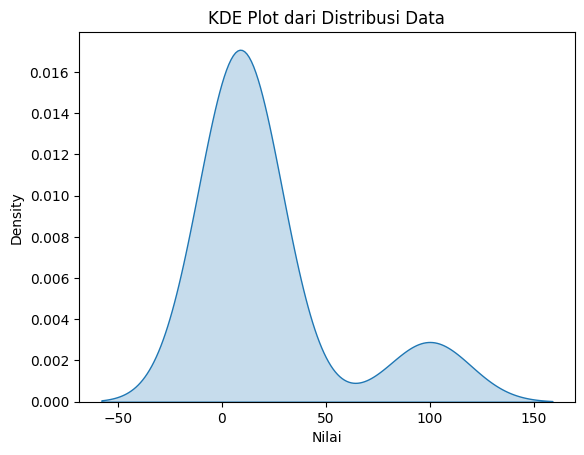

In [ ]:
# Test 2

data = [10, 12, 10, 11, 10, 12, 9, 10, 13, 100, 1, 2, 5, 100]

# Membuat KDE plot menggunakan Seaborn
sns.kdeplot(data, shade=True)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Density')
plt.title('KDE Plot dari Distribusi Data')

# Menampilkan plot
plt.show()

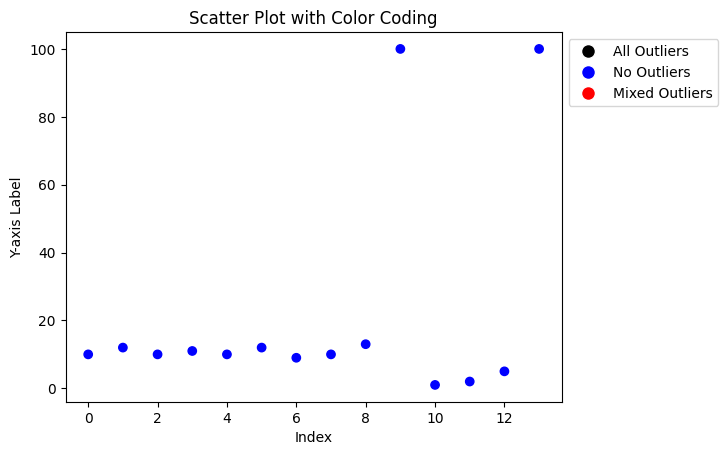

,Random_data,Median_AD,Dixon
0,10,0,0
1,12,0,0
2,10,0,0
3,11,0,0
4,10,0,0
5,12,0,0
6,9,0,0
7,10,0,0
8,13,0,0
9,100,0,0


In [ ]:
# Example data
data2= [10, 12, 10, 11, 10, 12, 9, 10, 13, 100, 1, 2, 5, 100]

# Display the result
data_outlier = scatterplot(data2)

data_outlier

**Test 3**

---

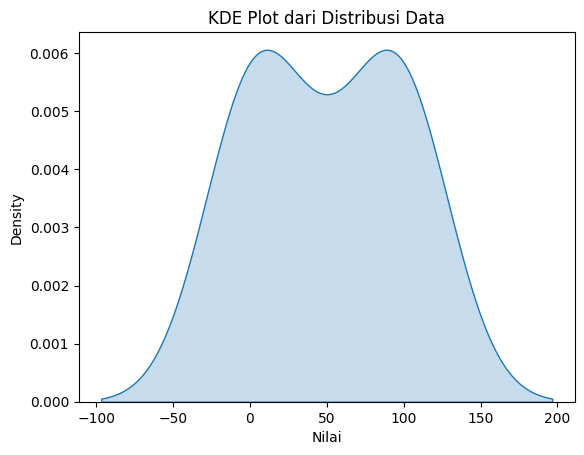

In [ ]:
# Test 3
data_3 = [1, 2, 3, 50, 97, 98, 99]

# Membuat KDE plot menggunakan Seaborn
sns.kdeplot(data_3, fill=True)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Density')
plt.title('KDE Plot dari Distribusi Data')

# Menampilkan plot
plt.show()

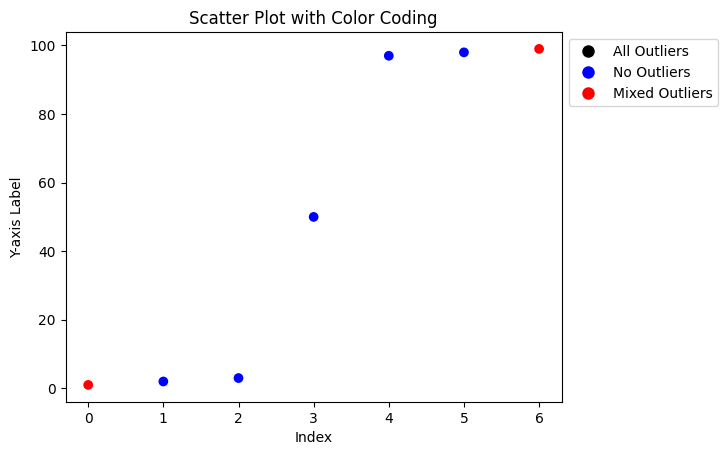

,Random_data,Median_AD,Dixon
0,1,1,0
1,2,0,0
2,3,0,0
3,50,0,0
4,97,0,0
5,98,0,0
6,99,1,0


In [ ]:
# Display the result
data_outlier = scatterplot(data_3)

data_outlier

Test 3 is bad because the distribution is bimodal; if we have two peak, we must use unsupervised, we use GaussianMixture for example.

# Clustering Univariate with Gaussian Mixture (Bimodal Dist)

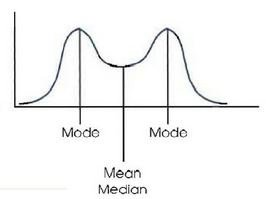

We search best cluster with internal criteria or internal validation measures:
- Silhouette Score
- Calinski-Harabasz Index
- Davies-Bouldin Score

Formula:

- $ CH = \frac {B}{W} \cdot \frac {N-k} {k-1} $

- $ DB =  \frac {1}{k}\sum_{i=1}^{k} max_j\neq_i \frac{s_i + s_j}{d(C_i,C_j)} $

- $ Silhouette = \frac {1}{N}\sum_{i=1}^{N} \frac{b_i - a_i}{max(a_i,b_i)} $

- **Silhouette** : Menghitung rata-rata jarak intra-klaster ($a_i$) dan rata-rata jarak inter-klaster ($b_i$) untuk setiap data. Silhouette Score kemudian dihitung menggunakan rumus yang membandingkan kedua rata-rata tersebut.

- **CH** : Menghitung varians antara klaster ($B$) dan varians dalam klaster ($W$). Index kemudian dihitung sebagai rasio
B terhadap W, dengan penyesuaian berdasarkan jumlah klaster ($k$) dan jumlah sampel ($N$)

- **DB** : Menghitung ukuran intra-klaster ($S_i$) dan jarak antar-klaster $(d(C_i,C_j))$ untuk setiap pasangan klaster. Davies-Bouldin Score kemudian dihitung sebagai rata-rata dari rasio ukuran intra-klaster terhadap jarak antar-klaster untuk setiap klaster.

Best cluster (Silhouette Score) = 3,dengan score = 0.8333255794719102
Best cluster (Calinski-Harabasz Index) = 5,dengan score = 6913.5
Best cluster (Davies-Bouldin Score) = 3,dengan score = 0.013888888888888888


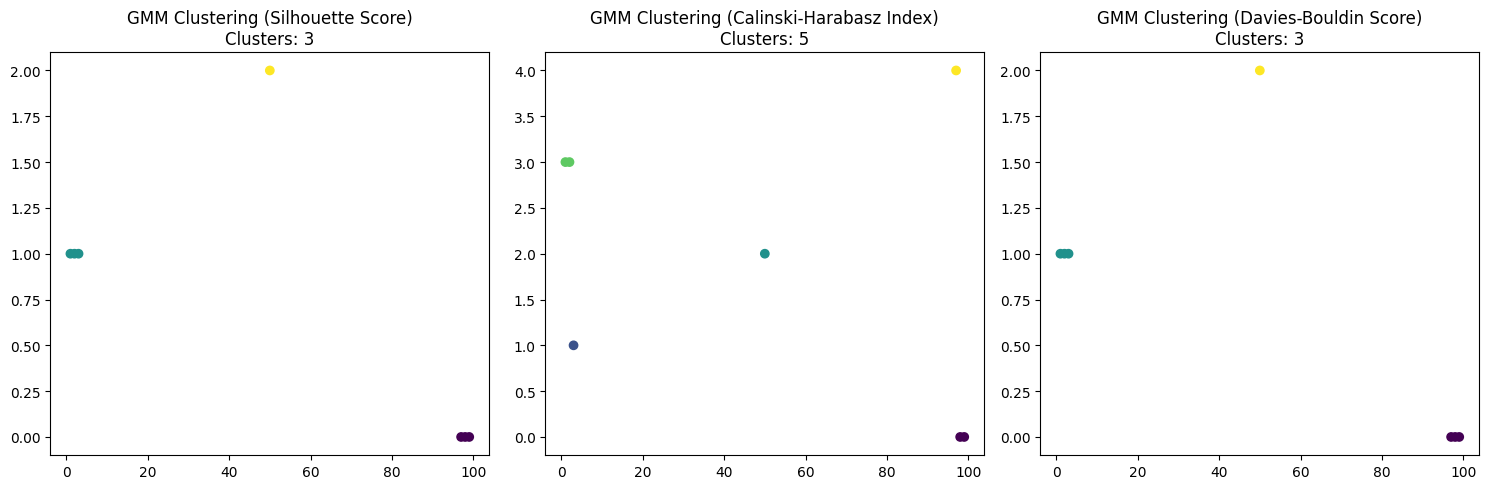

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Sample data
data = np.array(data_3).reshape(-1, 1)

def silhouette_validation(data):
    """
    Evaluate clustering using Silhouette Score.

    Parameters:
    -----------
    data: series data
      Input data for clustering.

    Returns:
    --------
      None
    """
    # Evaluation using Silhouette Score
    score_silhouette = []
    for i in range(2, min(10, len(data))):
        # Perform Gaussian Mixture Model clustering
        gmm = GaussianMixture(n_components=i, random_state=42)
        clusters = gmm.fit_predict(data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, clusters)

        # Save the result
        score_silhouette.append(silhouette_avg)

    best_index_silhouette = np.argmax(score_silhouette)
    best_components_silhouette = best_index_silhouette + 2

    # Print the best result using Silhouette Score
    print(f'Best cluster (Silhouette Score) = {best_components_silhouette},'
          f'dengan score = {score_silhouette[best_index_silhouette]}')

    return best_components_silhouette

def ch_validation(data):
    """
    Evaluate clustering using Calinski-Harabasz Index.

    Parameters:
    ----------
    data: series data
      Input data for clustering.

    Returns:
    --------
    None
    """
    # Evaluation using Calinski-Harabasz Index
    score_calinski_harabasz = []
    for i in range(2, min(10, len(data))):
        # Perform Gaussian Mixture Model clustering
        gmm = GaussianMixture(n_components=i, random_state=42)
        clusters = gmm.fit_predict(data)

        # Calculate Calinski-Harabasz Index
        calinski_harabasz_avg = calinski_harabasz_score(data, clusters)

        # Save the result
        score_calinski_harabasz.append(calinski_harabasz_avg)

    best_index_calinski_harabasz = np.argmax(score_calinski_harabasz)
    best_components_calinski_harabasz = best_index_calinski_harabasz + 2

    # Print the best result using Calinski-Harabasz Index
    print(f'Best cluster (Calinski-Harabasz Index) = {best_components_calinski_harabasz},'
          f'dengan score = {score_calinski_harabasz[best_index_calinski_harabasz]}')

    return best_components_calinski_harabasz

def db_validation(data):
    """
    Evaluate clustering using Davies-Bouldin Score.

    Parameters:
    -----------
    data: series data
      Input data for clustering.

    Returns:
    --------
    None
    """
    # Evaluation using Davies-Bouldin Score
    score_davies_bouldin = []
    for i in range(2, min(10, len(data))):
        # Perform Gaussian Mixture Model clustering
        gmm = GaussianMixture(n_components=i, random_state=42)
        clusters = gmm.fit_predict(data)

        # Calculate Davies-Bouldin Score
        davies_bouldin_avg = davies_bouldin_score(data, clusters)

        # Save the result
        score_davies_bouldin.append(davies_bouldin_avg)

    best_index_davies_bouldin = np.argmin(score_davies_bouldin)
    best_components_davies_bouldin = best_index_davies_bouldin + 2

    # Print the best result using Davies-Bouldin Score
    print(f'Best cluster (Davies-Bouldin Score) = {best_components_davies_bouldin},'
          f'dengan score = {score_davies_bouldin[best_index_davies_bouldin]}')

    return best_components_davies_bouldin

def validation_best_cluster():
    """
    Perform clustering validation using Silhouette Score, Calinski-Harabasz Index,
    and Davies-Bouldin Score.Fit Gaussian Mixture Models (GMM) with the best
    number of clusters obtained from each metric and visualize the clustering results.

    Returns:
    --------
    None
    """
    # Get the best number of clusters using evaluation functions
    best_components_silhouette = silhouette_validation(data)
    best_components_calinski_harabasz = ch_validation(data)
    best_components_davies_bouldin = db_validation(data)

    # Fit GMM models with the best number of clusters
    gmm_best_silhouette = GaussianMixture(n_components=best_components_silhouette,
                                          random_state=42)

    best_clusters_silhouette = gmm_best_silhouette.fit(data).predict(data)

    gmm_best_calinski_harabasz = GaussianMixture(n_components=best_components_calinski_harabasz,
                                                 random_state=42)

    best_clusters_calinski_harabasz = gmm_best_calinski_harabasz.fit(data).predict(data)

    gmm_best_davies_bouldin = GaussianMixture(n_components=best_components_davies_bouldin,
                                              random_state=42)

    best_clusters_davies_bouldin = gmm_best_davies_bouldin.fit(data).predict(data)

    plt.figure(figsize=(15, 5))

    # Plot using Silhouette Score
    plt.subplot(1, 3, 1)
    plt.scatter(data, best_clusters_silhouette,
                c=best_clusters_silhouette,
                cmap='viridis', marker='o')

    plt.title(f'GMM Clustering (Silhouette Score)\nClusters: {best_components_silhouette}')

    # Plot using Calinski-Harabasz Index
    plt.subplot(1, 3, 2)
    plt.scatter(data, best_clusters_calinski_harabasz,
                c=best_clusters_calinski_harabasz,
                cmap='viridis', marker='o')

    plt.title(f'GMM Clustering (Calinski-Harabasz Index)\nClusters: {best_components_calinski_harabasz}')

    # Plot using Davies-Bouldin Score
    plt.subplot(1, 3, 3)
    plt.scatter(data, best_clusters_davies_bouldin,
                c=best_clusters_davies_bouldin,
                cmap='viridis', marker='o')

    plt.title(f'GMM Clustering (Davies-Bouldin Score)\nClusters: {best_components_davies_bouldin}')

    plt.tight_layout()
    plt.show()

validation_best_cluster()

We obtain the best cluster as 3, because the Silhouette Score has high confidence and the Davies-Bouldin Score has low confidence, and Calinski-Harabasz is strong 5 cluster, but we chose three clusters because 2 vs 1.

## Detection Outlier with Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture
import math

def check_gaussian_mixture(col, best_fit_cluster_count):
    """
    Check for outliers in a numerical column using Gaussian Mixture Model (GMM) clustering.

    Parameters:
    -----------
    col : series data
      Input column containing numerical data.

    best_fit_cluster_count : int
      Number of clusters for Gaussian Mixture Model.

    Returns:
    --------
    outlier_scores : list
      List of outlier scores for each data point in the column.
    """
    X = np.array(col).reshape(-1, 1)

    # Fit Gaussian Mixture Model
    gm_model = GaussianMixture(n_components=best_fit_cluster_count,
                               random_state=0, max_iter=250,
                               covariance_type='full').fit(X)

    xdf = pd.DataFrame(X, columns=["value"])
    xdf["grp"] = list(gm_model.predict(X))

    # Calculate minimum number of items for small clusters
    min_num_items = math.ceil(xdf.shape[0] * 0.05)

    # Identify small clusters
    small_groups = xdf.groupby('grp').count().reset_index().query('value <= @min_num_items')
    small_groups["small_cluster"] = 1.0

    xdf = xdf.merge(small_groups[['grp', 'small_cluster']], on='grp', how='left').fillna(0)

    # Perform MAD (Median Absolute Deviation) check for outliers
    outlier_scores_mad = perform_mad_check(xdf)

    # Perform Dixon's Q test for outliers
    outlier_scores_dixon = check_dixon(col)

    # Combine outlier scores from MAD and Dixon's Q test
    outlier_scores = [max(os_mad, os_dixon) for os_mad, os_dixon in zip(outlier_scores_mad, outlier_scores_dixon)]

    return outlier_scores

def perform_statistical_calculations(data):
    """
    Perform statistical calculations on a given dataset.

    Parameters:
    -----------
    data : Series data
      Input numerical data.

    Returns:
    --------
    result : dict
      Dictionary containing statistical measures (e.g., median, MAD).
    """
    result = {}
    result["median"] = np.median(data)
    result["mad"] = np.median(np.abs(data - result["median"]))
    return result

def check_mad(value, median, mad, threshold):
    """
    Check if a value is far off from the median based on the Median Absolute Deviation (MAD).

    Parameters:
    -----------
    value : float
      The value to be checked.

    median : float
      The median of the data.

    mad : float
      The Median Absolute Deviation of the data.

    threshold : float
      The threshold for considering a value as far off.

    Returns:
    --------
    far_off : float
      A score indicating how far off the value is from the median.
    """
    if mad == 0:
        return 0.0
    else:
        far_off = np.abs((value - median) / mad)
        return far_off if far_off > threshold else 0.0

def perform_mad_check(xdf):
    """
    Perform MAD (Median Absolute Deviation) check for outliers in each cluster.

    Parameters:
    -----------
    xdf : DataFrame
      Input DataFrame with columns 'value', 'grp', and 'small_cluster'.

    Returns:
    --------
    outlier_scores : list
      List of outlier scores for each data point in the DataFrame.
    """
    # Initialize an empty list to store outlier scores
    outlier_scores = []

    # Iterate over unique cluster labels in the DataFrame
    for g in xdf["grp"].unique():
        # Extract data for the current cluster
        xdf_g = xdf[xdf["grp"] == g]

        # Calculate statistical measures for the cluster
        calc = perform_statistical_calculations(xdf_g["value"])

        # Drop duplicate rows, if any
        xdf_g = xdf_g.drop_duplicates()

        # Check if MAD (Median Absolute Deviation) is greater than 0
        if calc["mad"] > 0.0:
            # Calculate 'far_off' values using check_mad function for each data point in the cluster
            xdf_g['far_off'] = [check_mad(val, calc["median"], calc["mad"], 3.0) for val in xdf_g['value']]
        else:
            # Set 'far_off' to 0 if MAD is 0
            xdf_g['far_off'] = 0.0

        # Update 'far_off' values in the original DataFrame
        for r in range(len(xdf_g)):
            far_off_value = xdf_g.loc[xdf_g.index[r], "far_off"]
            if far_off_value is not None:
                xdf.loc[xdf['value'] == xdf_g.iloc[r, 0], "far_off"] = far_off_value

        # Combine 'small_cluster' and 'far_off' values, and append to the list of outlier scores
        outlier_scores.extend([max(sc, fo) for sc, fo in zip(xdf_g["small_cluster"].fillna(0), xdf_g["far_off"].fillna(0))])

    return outlier_scores

def check_dixon(data):
    """
    Perform Dixon's Q test for outlier detection.

    Parameters:
    -----------
    data series data
      Input data to be tested for outliers.

    Returns:
    --------
    res : list
      A list where each element is 1.0 if the corresponding data point is an outlier,
    and 0.0 otherwise.
    """
    # Change data to series
    series_data = pd.Series(data)

    # Critical values for Dixon's Q test at 95% confidence level
    q95 = [0.97, 0.829, 0.71, 0.625, 0.568, 0.526, 0.493, 0.466,
           0.444, 0.426, 0.41, 0.396, 0.384, 0.374, 0.365, 0.356,
           0.349, 0.342, 0.337, 0.331, 0.326, 0.321, 0.317, 0.312,
           0.308, 0.305, 0.301, 0.29]

    # Create a dictionary for critical values based on the number of observations
    Q95 = {n: q for n, q in zip(range(3, len(q95) + 1), q95)}

    # Initialize variables for minimum and maximum differences
    Q_mindiff, Q_maxdiff = (0, 0), (0, 0)

    # Sort the input data
    sorted_data = sorted(series_data)

    # Calculate Q_min (minimum difference)
    Q_min = (sorted_data[1] - sorted_data[0])
    try:
        Q_min = Q_min / (sorted_data[-1] - sorted_data[0])
    except ZeroDivisionError:
        pass
    Q_mindiff = (Q_min - Q95[len(series_data)], sorted_data[0])

    # Calculate Q_max (maximum difference)
    Q_max = abs(sorted_data[-2] - sorted_data[-1])
    try:
        Q_max = Q_max / abs(sorted_data[0] - sorted_data[-1])
    except ZeroDivisionError:
        pass
    Q_maxdiff = (Q_max - Q95[len(series_data)], sorted_data[-1])

    # Initialize a result list with zeros
    res = [0.0 for val in series_data]

    # Mark outliers based on Q_max and Q_min differences
    if Q_maxdiff[0] >= 0:
        indexes = series_data[series_data == Q_maxdiff[1]].index
        for i in indexes:
            res[i] = 1.0

    if Q_mindiff[0] >= 0:
        indexes = series_data[series_data == Q_mindiff[1]].index
        for i in indexes:
            res[i] = 1.0

    return res

def check_gaussian_mixture(col, best_fit_cluster_count):
    """
    Check for outliers in a numerical column using Gaussian Mixture Model (GMM) clustering.

    Parameters:
    -----------
    col : series data
      Input column containing numerical data.

    best_fit_cluster_count : int
      Number of clusters for Gaussian Mixture Model.

    Returns:
    --------
    outlier_scores_mad : list
      List of outlier scores from MAD for each data point in the column.

    outlier_scores_dixon : list
      List of outlier scores from Dixon's Q test for each data point in the column.
    """
    X = np.array(col).reshape(-1, 1)

    # Fit Gaussian Mixture Model
    gm_model = GaussianMixture(n_components=best_fit_cluster_count,
                               random_state=0, max_iter=250,
                               covariance_type='full').fit(X)

    xdf = pd.DataFrame(X, columns=["value"])
    xdf["grp"] = list(gm_model.predict(X))

    # Calculate minimum number of items for small clusters
    min_num_items = math.ceil(xdf.shape[0] * 0.05)

    # Identify small clusters
    small_groups = xdf.groupby('grp').count().reset_index().query('value <= @min_num_items')
    small_groups["small_cluster"] = 1.0

    xdf = xdf.merge(small_groups[['grp', 'small_cluster']], on='grp', how='left').fillna(0)

    # Perform MAD (Median Absolute Deviation) check for outliers
    outlier_scores_mad = perform_mad_check(xdf)

    # Perform Dixon's Q test for outliers
    outlier_scores_dixon = check_dixon(col)

    return outlier_scores_mad, outlier_scores_dixon

# Example usage
data_3 = [1, 2, 3, 50, 97, 98, 99]

best_fit_cluster_count = 3

outlier_scores_mad, outlier_scores_dixon = check_gaussian_mixture(col = data_3,
                                                                  best_fit_cluster_count = best_fit_cluster_count)
print("MAD Outlier Scores:", outlier_scores_mad)
print("Dixon Outlier Scores:", outlier_scores_dixon)

MAD Outlier Scores: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Dixon Outlier Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


MAD very sensitive if detection outlier, if for bimodal dist, we recommend using MAD

# Multivariate data (Unsupervised Machine Learning)

In [ ]:
# Generated Data

# Seed untuk reproducibility
np.random.seed(42)

# Membuat DataFrame awal
data = {
    'Timestamp': pd.date_range(start='2023-01-01', periods=200, freq='H'),
    'Amount': np.random.uniform(low=10, high=100, size=200),
    'Merchant': np.random.choice(['StoreA', 'StoreB', 'StoreC'], size=200),
    'City': np.random.choice(['CityX', 'CityY', 'CityZ'], size=200),
    'Category': np.random.choice(['Grocery', 'Electronics', 'Clothing'], size=200),
}

df = pd.DataFrame(data)

# Menambahkan beberapa outlier ke kolom 'Amount'
num_outliers = 5
outlier_indices = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices, 'Amount'] = np.random.uniform(low=200, high=1000, size=num_outliers)

# Menampilkan DataFrame
df

,Timestamp,Amount,Merchant,City,Category
0,2023-01-01 00:00:00,43.708611,StoreC,CityY,Grocery
1,2023-01-01 01:00:00,95.564288,StoreA,CityY,Clothing
2,2023-01-01 02:00:00,75.879455,StoreB,CityX,Grocery
3,2023-01-01 03:00:00,63.879264,StoreB,CityZ,Electronics
4,2023-01-01 04:00:00,24.041678,StoreC,CityX,Grocery
...,...,...,...,...,...
195,2023-01-09 03:00:00,41.428862,StoreA,CityX,Clothing
196,2023-01-09 04:00:00,75.336011,StoreB,CityY,Clothing
197,2023-01-09 05:00:00,90.739923,StoreB,CityY,Grocery
198,2023-01-09 06:00:00,89.837778,StoreB,CityX,Grocery


In [ ]:
# Encoding Data

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer

# Separate the categorical and numeric columns
category_columns = df[['Merchant', 'City', 'Category']]
numeric_columns = df[['Amount']]

# Apply One-Hot Encoding to categorical columns
ohe = pd.get_dummies(category_columns)

# Concatenate the One-Hot Encoded columns with the numeric columns
ohe_data = pd.concat([numeric_columns, ohe], axis=1)

# copy data
ohe_data_copy = ohe_data.copy()

# Display the resulting DataFrame
ohe_data.head()

,Amount,Merchant_StoreA,Merchant_StoreB,Merchant_StoreC,City_CityX,City_CityY,City_CityZ,Category_Clothing,Category_Electronics,Category_Grocery
0,43.708611,0,0,1,0,1,0,0,0,1
1,95.564288,1,0,0,0,1,0,1,0,0
2,75.879455,0,1,0,1,0,0,0,0,1
3,63.879264,0,1,0,0,0,1,0,1,0
4,24.041678,0,0,1,1,0,0,0,0,1


## DBSCAN

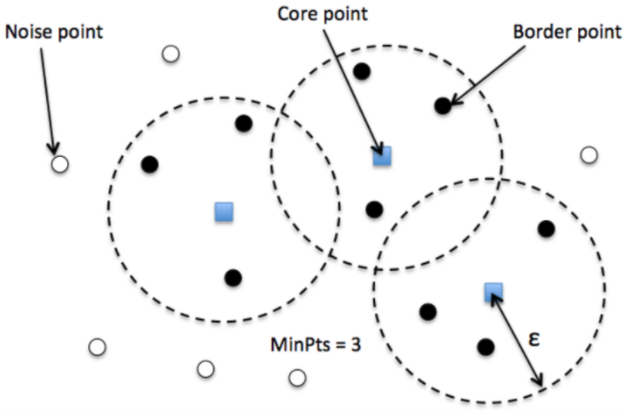

How to DBSCAN work?

- **Initialization**: Choose two main parameters, namely epsilon ($ε$), which is the maximum distance to define neighbors, and MinPts, which is the minimum number of points within a radius of $ε$ for a point to be considered a core point.

- **Identify Core Points**: Examine each point in the dataset. If there are at least MinPts other points within a radius of
$ε$ from that point, the point is considered a core point.

- **Cluster Formation**: Starting from core points, identify and add all points that are transitively reachable (connected) within a radius of $ε$ to the same cluster.

- **Identify Border Points**: Identify points that are within a radius of $ε$ from a cluster but are not part of the core of the cluster. These points are considered border points.

- **Identify Noise Points**: Points that do not belong to any cluster and do not qualify as border points are considered noise points.

Silhouette Score: 0.9275681716857329 : Epsilon 2
Calinski-Harabasz Index: 4307.7786524838775 : Epsilon 2
Davies-Bouldin Score: 0.41614460958352467 : Epsilon 2


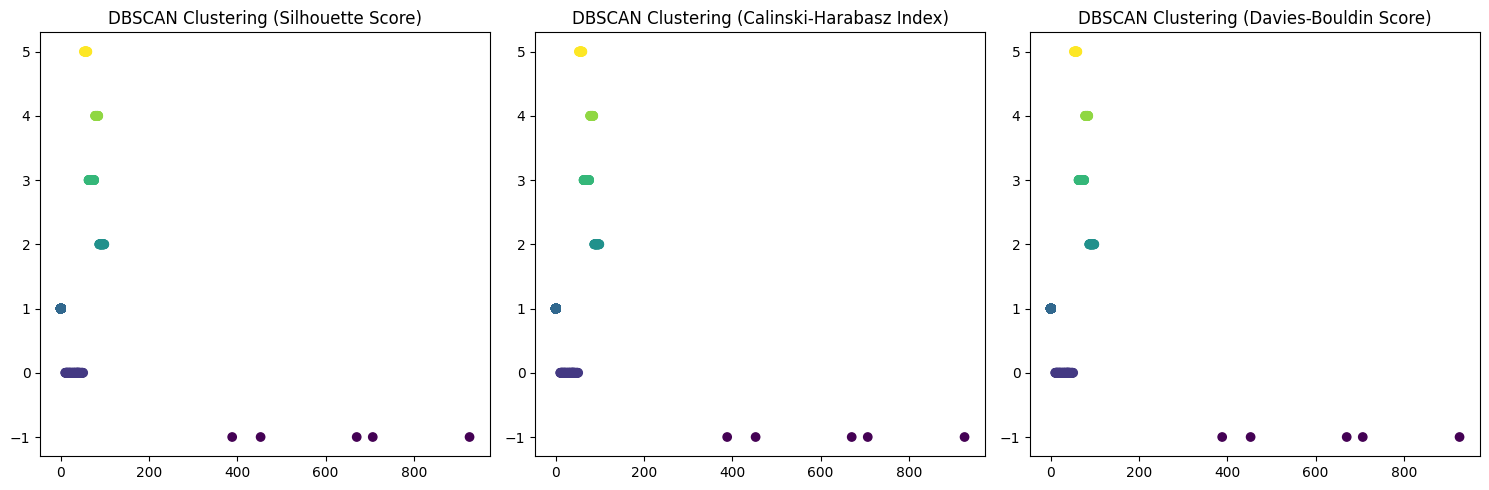

In [ ]:
# Validation best epsilon

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Sample data
data = np.array(ohe_data_copy).reshape(-1, 1)

# Evaluasi menggunakan Silhouette Score
eps_silhouette = 2  # Ganti nilai ini sesuai kebutuhan
min_samples_silhouette = 5  # Ganti nilai ini sesuai kebutuhan

dbscan_silhouette = DBSCAN(eps=eps_silhouette, min_samples=min_samples_silhouette)
clusters_silhouette = dbscan_silhouette.fit_predict(data)
silhouette_avg = silhouette_score(data, clusters_silhouette)

print(f'Silhouette Score: {silhouette_avg} : Epsilon {eps_silhouette}')

# Evaluasi menggunakan Calinski-Harabasz Index
eps_calinski_harabasz = 2  # Ganti nilai ini sesuai kebutuhan
min_samples_calinski_harabasz = 5  # Ganti nilai ini sesuai kebutuhan

dbscan_calinski_harabasz = DBSCAN(eps=eps_calinski_harabasz, min_samples=min_samples_calinski_harabasz)
clusters_calinski_harabasz = dbscan_calinski_harabasz.fit_predict(data)
calinski_harabasz_avg = calinski_harabasz_score(data, clusters_calinski_harabasz)

print(f'Calinski-Harabasz Index: {calinski_harabasz_avg} : Epsilon {eps_calinski_harabasz}')

# Evaluasi menggunakan Davies-Bouldin Score
eps_davies_bouldin = 2  # Ganti nilai ini sesuai kebutuhan
min_samples_davies_bouldin = 5  # Ganti nilai ini sesuai kebutuhan

dbscan_davies_bouldin = DBSCAN(eps=eps_davies_bouldin, min_samples=min_samples_davies_bouldin)
clusters_davies_bouldin = dbscan_davies_bouldin.fit_predict(data)
davies_bouldin_avg = davies_bouldin_score(data, clusters_davies_bouldin)

print(f'Davies-Bouldin Score: {davies_bouldin_avg} : Epsilon {eps_davies_bouldin}')

# Visualize the clusters using a scatter plot
plt.figure(figsize=(15, 5))

# Plot using Silhouette Score
plt.subplot(1, 3, 1)
plt.scatter(data, clusters_silhouette, c=clusters_silhouette, cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering (Silhouette Score)')

# Plot using Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.scatter(data, clusters_calinski_harabasz, c=clusters_calinski_harabasz, cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering (Calinski-Harabasz Index)')

# Plot using Davies-Bouldin Score
plt.subplot(1, 3, 3)
plt.scatter(data, clusters_davies_bouldin, c=clusters_davies_bouldin, cmap='viridis', marker='o')
plt.title(f'DBSCAN Clustering (Davies-Bouldin Score)')

plt.tight_layout()
plt.show()

In [ ]:
# DBSCAN

from sklearn.cluster import DBSCAN

# Assuming ohe_data_copy is your input data

# Perform clustering
clustering = DBSCAN(eps=2, min_samples=5).fit(ohe_data_copy)

# Access cluster labels
labels = clustering.labels_

# Count the number of clusters (excluding noise points)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count the number of noise points
num_noise_points = list(labels).count(-1)

# Print the results
print("Number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)

Number of clusters: 10
Number of noise points: 136


In [ ]:
# Create new column

df['Outlier_DBSCAN'] = np.where(labels < 0 , 1, 0)

df

,Timestamp,Amount,Merchant,City,Category,Outlier_DBSCAN
0,2023-01-01 00:00:00,43.708611,StoreC,CityY,Grocery,1
1,2023-01-01 01:00:00,95.564288,StoreA,CityY,Clothing,1
2,2023-01-01 02:00:00,75.879455,StoreB,CityX,Grocery,1
3,2023-01-01 03:00:00,63.879264,StoreB,CityZ,Electronics,0
4,2023-01-01 04:00:00,24.041678,StoreC,CityX,Grocery,1
...,...,...,...,...,...,...
195,2023-01-09 03:00:00,41.428862,StoreA,CityX,Clothing,1
196,2023-01-09 04:00:00,75.336011,StoreB,CityY,Clothing,1
197,2023-01-09 05:00:00,90.739923,StoreB,CityY,Grocery,0
198,2023-01-09 06:00:00,89.837778,StoreB,CityX,Grocery,0


In [ ]:
outlier_percentage = df['Outlier_DBSCAN'].value_counts(normalize=True) * 100
outlier_percentage

1    68.0
0    32.0
Name: Outlier_DBSCAN, dtype: float64

In [ ]:
# Validation data

# Find labels less than 0
outlier_indices = np.where(labels < 0)[0]

# Find equal index
validation_result = df.loc[df['Outlier_DBSCAN'] == 1].index.equals(pd.Index(outlier_indices))

# Check validation result
if validation_result:

    print("Validation successful: Outliers correctly identified.")

else:

    print("Validation failed: Outliers not correctly identified.")

df.head()

Validation successful: Outliers correctly identified.


,Timestamp,Amount,Merchant,City,Category,Outlier_DBSCAN
0,2023-01-01 00:00:00,43.708611,StoreC,CityY,Grocery,1
1,2023-01-01 01:00:00,95.564288,StoreA,CityY,Clothing,1
2,2023-01-01 02:00:00,75.879455,StoreB,CityX,Grocery,1
3,2023-01-01 03:00:00,63.879264,StoreB,CityZ,Electronics,0
4,2023-01-01 04:00:00,24.041678,StoreC,CityX,Grocery,1


## Local Outlier Factor

<center>
<img src="https://drive.google.com/uc?id=1drpGDQChaVWpRZh5Jl58xZbOayo7vp_r" width=600px;> <br>
</center>

[sumber gambar](https://miro.medium.com/v2/resize:fit:1400/1*25WB93h842dgFHN7GKrKpg.jpeg)

**Local Neighborhood Selection**: LOF examines the local neighborhood of each data point by measuring the distances between the data point and its nearby points.

**Local Density Computation**: The method calculates the local density for each data point by comparing its density to that of its neighbors. Points with lower density compared to their neighbors are likely to be outliers.

**LOF Computation**: LOF calculates the Local Outlier Factor for each data point by comparing its density to that of its neighbors. High LOF values indicate potential outliers.

**Outlier Determination**: Data points with high LOF values are considered outliers, while those with low LOF values are considered normal.

In [ ]:
# Find best K

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor

# Prepare the data
d2 = df.values
ohe_data = ohe_data_copy

# Specify the values of n_neighbors to be tested
param_grid = {'n_neighbors': [5, 10, 15, 20, 25]}

# Create the LOF model
lof = LocalOutlierFactor(contamination=0.2)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=lof, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Perform the search for the best parameters
grid_search.fit(ohe_data)

# Display the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 5}


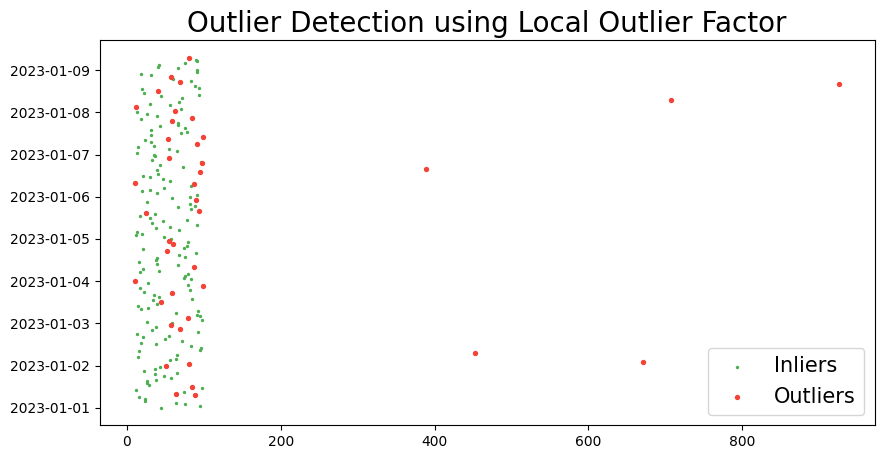

In [ ]:
# Convert the DataFrame to a numpy array
d2 = df.values

# Instantiate the LocalOutlierFactor with specified parameters
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.2)

# Fit the LOF model and predict inlier/outlier labels
df['outlier_lof'] = lof.fit_predict(ohe_data)

# Plotting the inliers and outliers
plt.figure(figsize=(10, 5))
plt.scatter(d2[df['outlier_lof'] == 1, 1], d2[df['outlier_lof'] == 1, 0], s=2, label="Inliers", color="#4CAF50")
plt.scatter(d2[df['outlier_lof'] == -1, 1], d2[df['outlier_lof'] == -1, 0], s=8, label="Outliers", color="#F44336")

# Set plot title and legend
plt.title('Outlier Detection using Local Outlier Factor', fontsize=20)
plt.legend(fontsize=15, title_fontsize=15)

# Show the plot
plt.show()

In [ ]:
# check update outlier

outlier_percentage = df['outlier_lof'].value_counts(normalize=True) * 100
outlier_percentage

 1    80.0
-1    20.0
Name: outlier_lof, dtype: float64

In [ ]:
# Final

df.head()

,Timestamp,Amount,Merchant,City,Category,Outlier_DBSCAN,outlier_lof
0,2023-01-01 00:00:00,43.708611,StoreC,CityY,Grocery,1,1
1,2023-01-01 01:00:00,95.564288,StoreA,CityY,Clothing,1,1
2,2023-01-01 02:00:00,75.879455,StoreB,CityX,Grocery,1,1
3,2023-01-01 03:00:00,63.879264,StoreB,CityZ,Electronics,0,1
4,2023-01-01 04:00:00,24.041678,StoreC,CityX,Grocery,1,1


**Investigation**

----

To gain confidence that this data point is an outlier, we need to conduct further investigation. However, I am unable to continue with the investigation.